In [39]:
import pandas as pd
import seaborn as sns

In [40]:
data2=pd.read_csv("post-operative.dat",header=None,names=['L-CORE', 'L-SURF', 'L-O2', 'L-BP', 'SURF-STBL', 'CORE-STBL', 'BP-STBL', 'COMFORT', 'Decision'], skiprows=13)

In [41]:
data2.head()

,L-CORE,L-SURF,L-O2,L-BP,SURF-STBL,CORE-STBL,BP-STBL,COMFORT,Decision
0,mid,low,excellent,mid,stable,stable,stable,15,A
1,mid,high,excellent,high,stable,stable,stable,10,S
2,high,low,excellent,high,stable,stable,mod-stable,10,A
3,mid,low,good,high,stable,unstable,mod-stable,15,A
4,mid,mid,excellent,high,stable,stable,stable,10,A


# EDA

In [42]:
data2['L-CORE'].unique()

array(['mid', 'high', 'low'], dtype=object)

In [43]:
data1=data2.copy()

In [44]:
for n, c in enumerate(data1.columns):
    print('Variable {} has unique values: {} '.format(c, data[c].unique()))

Variable L-CORE has unique values: ['mid' 'high' 'low'] 
Variable L-SURF has unique values: ['low' 'high' 'mid'] 
Variable L-O2 has unique values: ['excellent' 'good'] 
Variable L-BP has unique values: ['mid' 'high' 'low'] 
Variable SURF-STBL has unique values: ['stable' 'unstable'] 
Variable CORE-STBL has unique values: ['stable' 'unstable' 'mod-stable'] 
Variable BP-STBL has unique values: ['stable' 'mod-stable' 'unstable'] 
Variable COMFORT has unique values: ['15' '10' '05' '07' '?'] 
Variable Decision has unique values: ['A' 'S' 'I'] 


In [45]:
data1.COMFORT.replace('?', data1.COMFORT.mode()[0], inplace=True)

In [46]:
def get_cat_code(str_val):
    if str_val in ['low', 'good', 'unstable', '05', 'I']:
        return 0
    if str_val in ['high', 'excellent', 'mod-stable', '07', 'A']:
        return 1
    if str_val in ['mid', '10', 'stable', '10', 'S']:
        return 2
    if str_val in ['15']:
        return 3

In [47]:
for c in data1.columns:
    data1['x_' + c] = data[c].apply(lambda x: get_cat_code(x))

In [48]:
data1.drop(data.columns, axis=1, inplace=True)


In [51]:
data1.columns

Index(['x_L-CORE', 'x_L-SURF', 'x_L-O2', 'x_L-BP', 'x_SURF-STBL',
       'x_CORE-STBL', 'x_BP-STBL', 'x_COMFORT', 'x_Decision'],
      dtype='object')

# lmplot

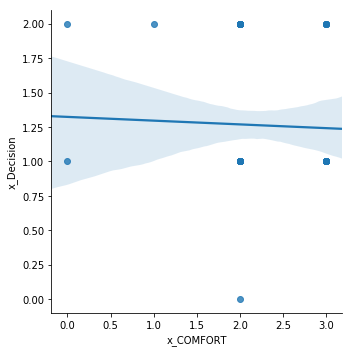

In [52]:
sns.lmplot(x='x_COMFORT',y='x_Decision',data=data1)

In [53]:
# we are getting max desicion at comfort 0 then 3 then 2

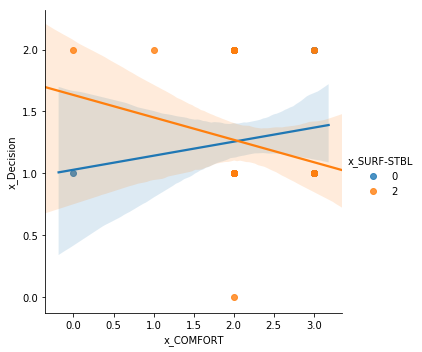

In [56]:
sns.lmplot(x='x_COMFORT',y='x_Decision',hue='x_SURF-STBL',data=data1)

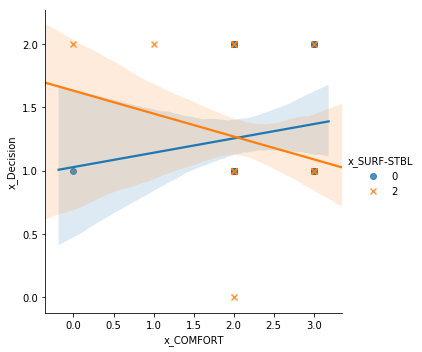

In [60]:
sns.lmplot(x='x_COMFORT',y='x_Decision',hue='x_SURF-STBL',data=data1,markers=["o", "x"])

# relplot

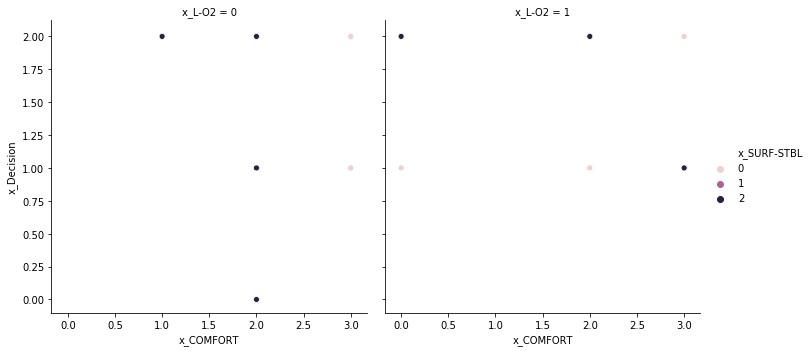

In [67]:
sns.relplot(x='x_COMFORT',y='x_Decision',hue='x_SURF-STBL',col='x_L-O2',data=data1)

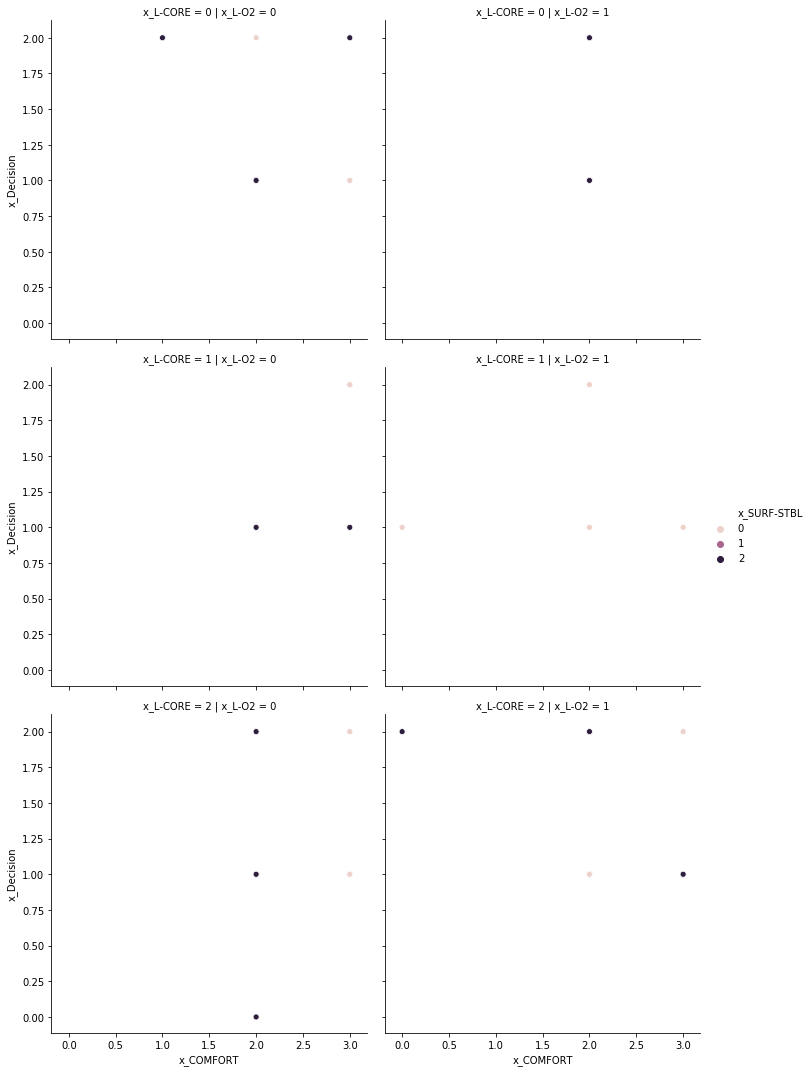

In [68]:
sns.relplot(x='x_COMFORT',y='x_Decision',hue='x_SURF-STBL',col='x_L-O2',row='x_L-CORE',data=data1)

# Box Plot 

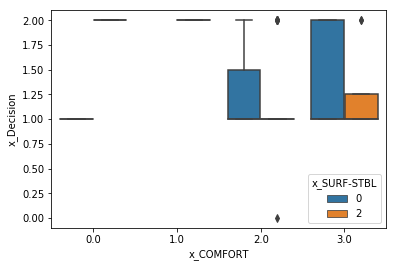

In [70]:
sns.boxplot(x='x_COMFORT',y='x_Decision',hue='x_SURF-STBL',data=data1)

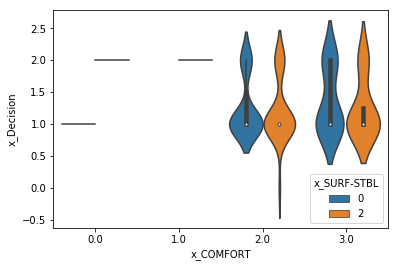

In [72]:
sns.violinplot(x='x_COMFORT',y='x_Decision',hue='x_SURF-STBL',data=data1)

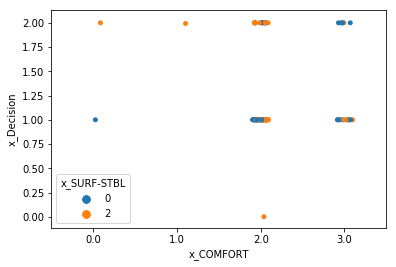

In [73]:
sns.stripplot(x='x_COMFORT',y='x_Decision',hue='x_SURF-STBL',data=data1)

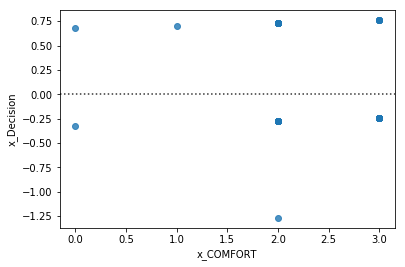

In [75]:
sns.residplot(x='x_COMFORT',y='x_Decision',data=data1)